In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
import db_connection
import numpy as np

In [7]:
#leer db
query = "select * from grammys"
dataframe_raw = pd.read_sql(sql=query, con = db_connection.connection().connect())

In [8]:
dataframe_raw.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


Tipo de dato de las variables del conjunto

In [14]:
dataframe_raw.dtypes

year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

Columnas en el conjunto de datos

In [ ]:
dataframe_raw.columns

Cantidad de variables en cada tipo de dato

In [15]:
(
    dataframe_raw
    .dtypes
    .value_counts()
)

object    8
int64     1
bool      1
Name: count, dtype: int64

Cantidad de variables y observaciones

In [16]:
dataframe_raw.shape

(4810, 10)

Existencia de valores nulos

In [17]:
(   dataframe_raw
    .isnull()
    .any()
)

year            False
title           False
published_at    False
updated_at      False
category        False
nominee          True
artist           True
workers          True
img              True
winner          False
dtype: bool

DE tener observaciones con valores nulos, ¿cuantas hay por cada variable?

In [11]:
(
    dataframe_raw
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

workers         2190
artist          1840
img             1367
nominee            6
year               0
title              0
published_at       0
updated_at         0
category           0
winner             0
dtype: int64

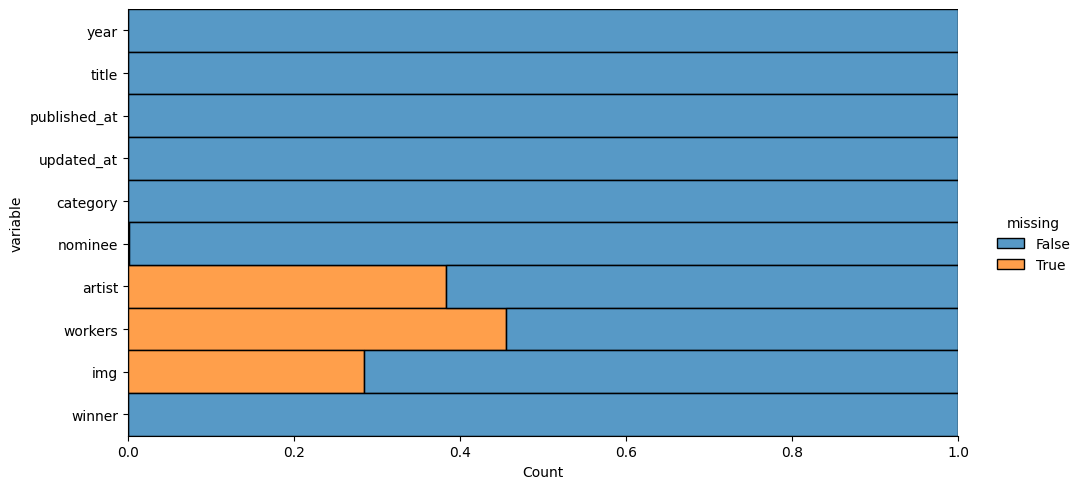

In [18]:
(
    dataframe_raw
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

En este gráfico podemos ver que las columnas `year`, `title`, `published_at`, `updated_at`, `category`, y `winner` están completamente llenas, mientras que las columnas `artist`, `workers`, e `img` presentan una cantidad significativa de datos faltantes, con aproximadamente un 40%, 50% y 30% de valores nulos respectivamente. 


In [19]:
# Revisar los tipos de datos
dataframe_raw.info()

# Limpiar los datos: eliminar duplicados
data_clean = dataframe_raw.drop_duplicates()

# Revisar valores nulos por columna
missing_values = data_clean.isnull().sum().sort_values(ascending=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


Valores nulos en total

In [27]:
(
    dataframe_raw
    .isnull()
    .sum()
    .sum()
)

np.int64(5403)

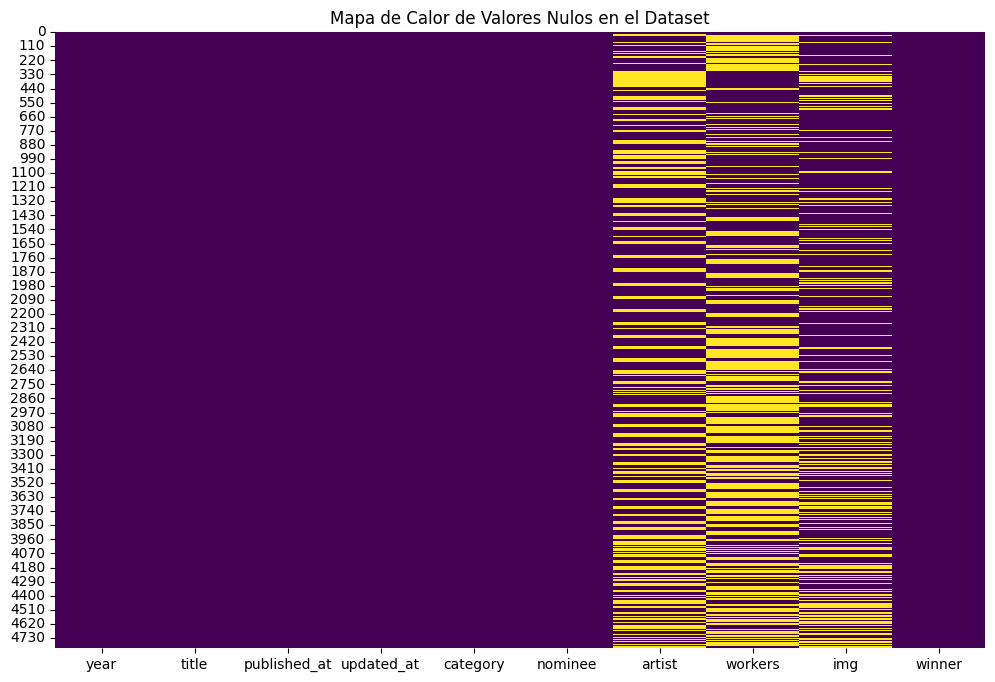

In [26]:
# Crear un gráfico de calor (heatmap) para visualizar los valores nulos en todo el conjunto de datos
plt.figure(figsize=(12, 8))
sns.heatmap(data_clean.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos en el Dataset')
plt.show()

El mapa de calor de valores nulos muestra que las columnas como `year`, `title`, `category`, y `winner` no tienen valores faltantes, mientras que las columnas `artist`, `workers`, e `img` presentan una cantidad significativa de valores nulos. La columna `workers` es la más afectada, con aproximadamente el 50% de datos faltantes, seguida de `artist` y `img`.

Distribucion de los premios por artista

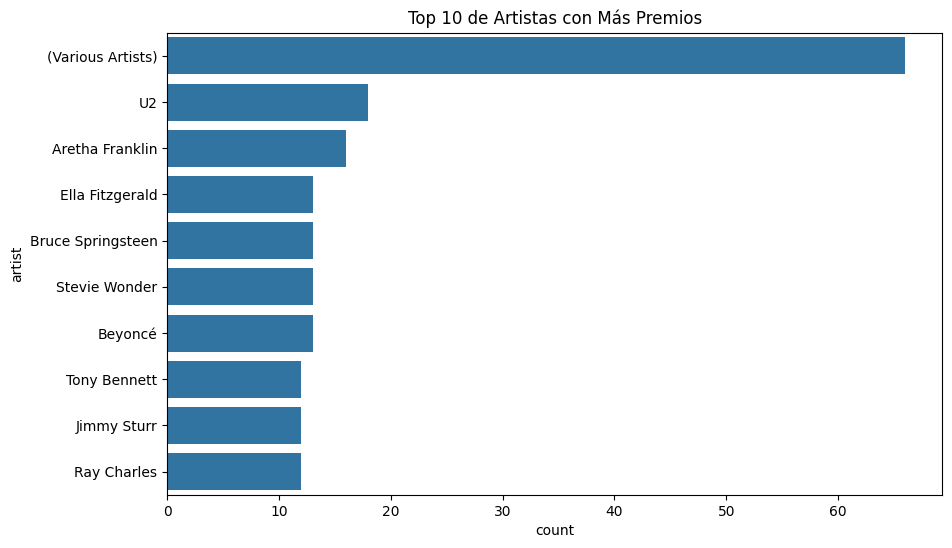

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_clean, y='artist', order=data_clean['artist'].value_counts().head(10).index)
plt.title('Top 10 de Artistas con Más Premios')
plt.show()


El gráfico muestra los 10 artistas con más premios en los Grammy. En el primer lugar, se encuentra "Various Artists", lo cual podría referirse a colaboraciones o compilaciones de varios artistas que han ganado un número considerable de premios, superando por amplio margen a los demás. Entre los artistas individuales, U2 encabeza la lista, seguido por Aretha Franklin, Ella Fitzgerald, y otros grandes nombres como Bruce Springsteen, Stevie Wonder y Beyoncé.

Número de ganadores por año.

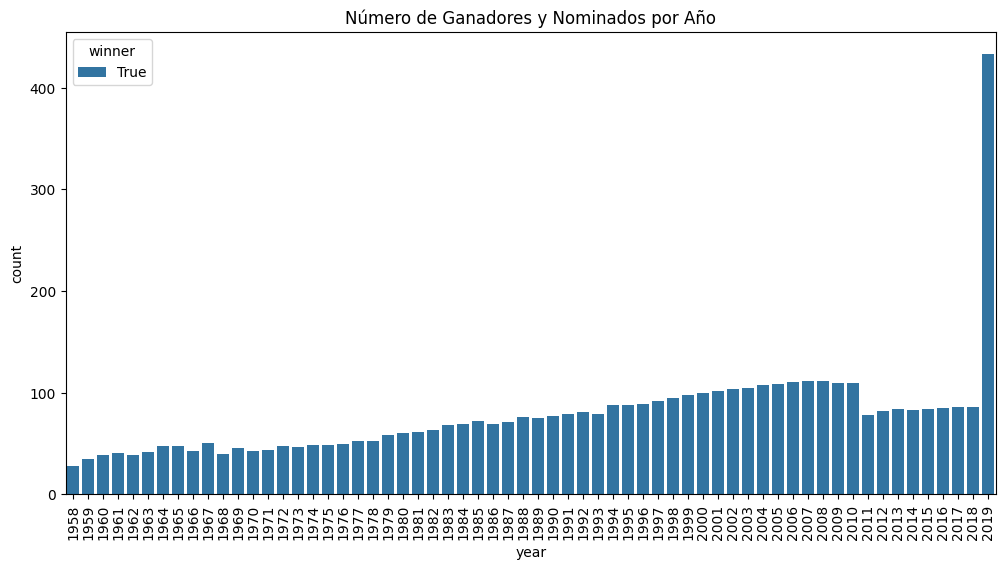

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_clean, x='year', hue='winner')
plt.xticks(rotation=90)
plt.title('Número de Ganadores y Nominados por Año')
plt.show()

El gráfico muestra el número de ganadores por año en los premios Grammy desde 1958 hasta 2019. Se observa una tendencia general al alza en el número de ganadores a lo largo de los años, con un aumento más notable a partir de la década de 1980. El número de ganadores parece estabilizarse en los años 2000, con ligeras fluctuaciones. Sin embargo, en 2019 hay un salto significativo, lo que podría deberse a un aumento en la cantidad de categorías o premios especiales ese año.

Distribución de nominaciones y premios a lo largo del tiempo.

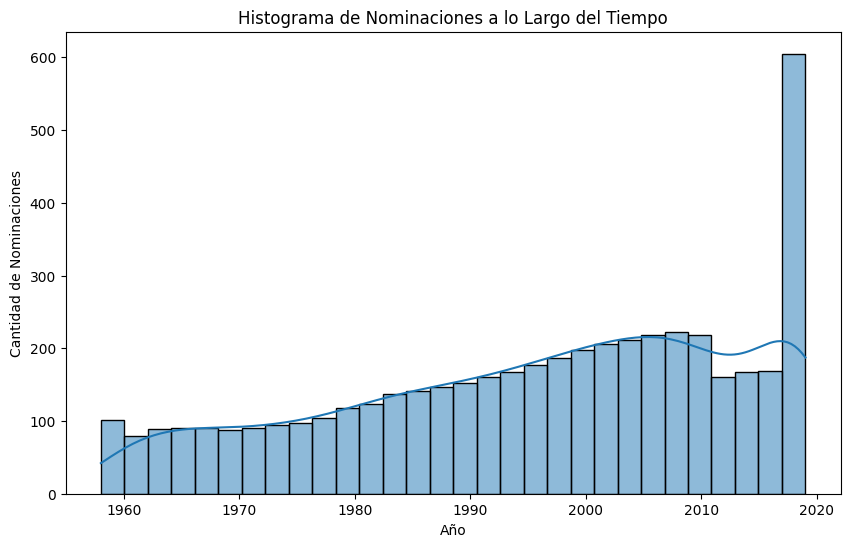

In [48]:
# Histograma de duraciones de nominaciones
plt.figure(figsize=(10, 6))
sns.histplot(data=data_clean, x='year', kde=True, bins=30)
plt.title('Histograma de Nominaciones a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Nominaciones')
plt.show()

Este histograma muestra la cantidad de nominaciones a los premios Grammy a lo largo del tiempo. Desde la década de 1960, se observa un aumento gradual en las nominaciones, con un crecimiento más marcado a partir de los años 1980 y un notable pico en 2020. 

Proporciones de diferentes categorías por año.

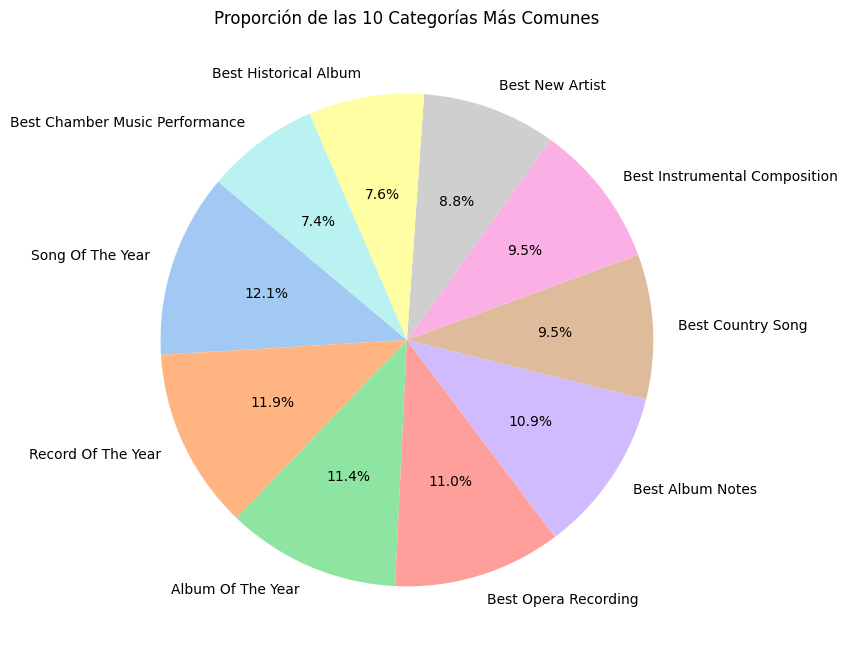

In [49]:

# Gráfico de tarta: Proporciones de diferentes categorías
category_counts = data_clean['category'].value_counts().head(10)  # Las 10 categorías más comunes
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporción de las 10 Categorías Más Comunes')
plt.show()

El gráfico de pastel muestra la proporción de las 10 categorías más comunes en los premios Grammy. "Song of the Year" es la categoría más representada, con un 12.1% del total, seguida de "Record of the Year" y "Album of the Year", con proporciones cercanas al 11%. Otras categorías significativas incluyen "Best New Artist" y "Best Instrumental Composition", cada una con alrededor del 9-10%. Las categorías menos frecuentes en este grupo son "Best Chamber Music Performance" y "Best Historical Album".

cantidad de duplicados

In [28]:
duplicados = dataframe_raw.duplicated()
duplicados.sum()

np.int64(0)

## Conteos y proporciones

In [20]:
dataframe_raw.describe(include='all')

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
count,4810.000000,4810,4810,4810,4810,4804,2970,2620,3443,4810
unique,NaN,62,4,10,638,4131,1658,2366,1463,1
top,NaN,62nd Annual GRAMMY Awards (2019),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Song Of The Year,Bridge Over Troubled Water,(Various Artists),"John Williams, composer (John Williams)",https://www.grammy.com/sites/com/files/styles/...,True
freq,NaN,433,4205,778,70,7,66,20,26,4810
mean,1995.566944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.149720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1958.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Numéricas
dataframe_raw.describe(include=[np.number])

,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


In [30]:
#Categóricas
dataframe_raw.describe(include=object)

,title,published_at,updated_at,category,nominee,artist,workers,img
count,4810,4810,4810,4810,4804,2970,2620,3443
unique,62,4,10,638,4131,1658,2366,1463
top,62nd Annual GRAMMY Awards (2019),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Song Of The Year,Bridge Over Troubled Water,(Various Artists),"John Williams, composer (John Williams)",https://www.grammy.com/sites/com/files/styles/...
freq,433,4205,778,70,7,66,20,26


In [31]:
#booleanas
dataframe_raw.describe(include=bool)

,winner
count,4810
unique,1
top,True
freq,4810


Categorías con mas nominaciones cada año

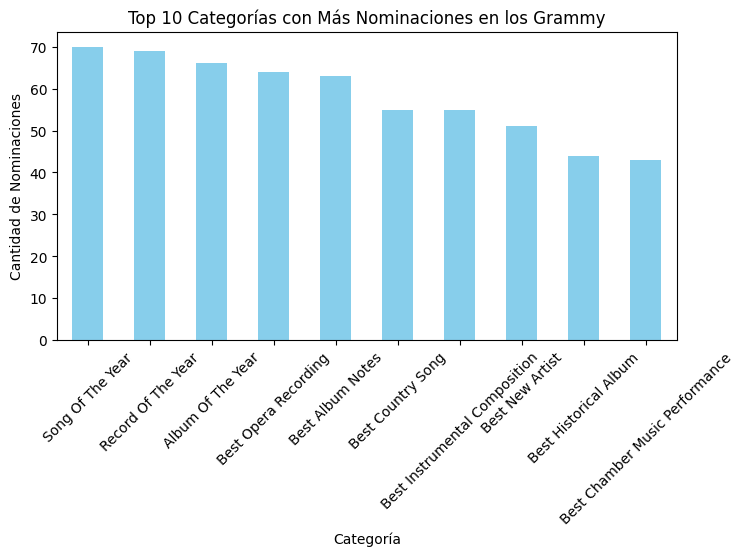

In [32]:
# 1. Filtrar las 10 categorías con más nominaciones
top_10_categories = dataframe_raw['category'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras
plt.figure(figsize=(8, 4))
top_10_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Nominaciones')
plt.title('Top 10 Categorías con Más Nominaciones en los Grammy')
plt.xticks(rotation=45)
plt.savefig('top_10_category.jpg', format='jpg')
plt.show()

Artistas con más nominaciones

In [ ]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = dataframe_raw['artist'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras con un tamaño más pequeño
plt.figure(figsize=(8, 4))  # Ancho x Alto en pulgadas
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Cantidad de Nominaciones')
plt.title('Top 10 Artistas con Más Nominaciones en los Grammy')
plt.xticks(rotation=45)

# 3. Guardar la gráfica en formato JPG
plt.savefig('top_10_artists.jpg', format='jpg')

# 4. Mostrar la gráfica en pantalla
plt.show()

Canciones más nominadas

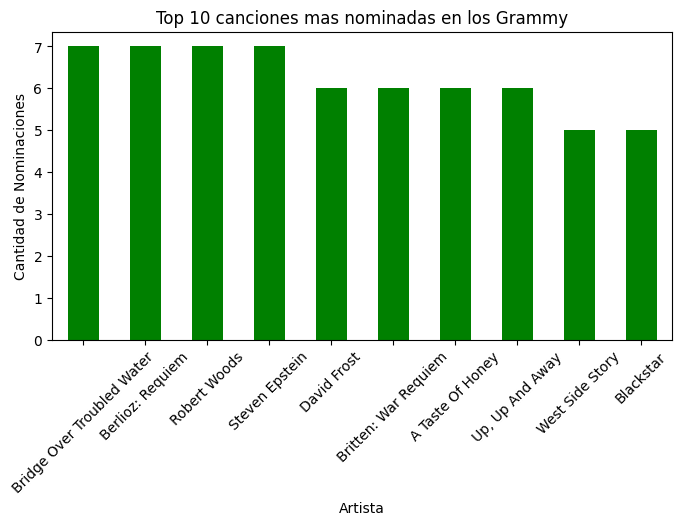

In [33]:
# 1. Filtrar los 10 artistas con más nominaciones
top_10_artists = dataframe_raw['nominee'].value_counts().nlargest(10)

# 2. Crear el gráfico de barras
plt.figure(figsize=(8, 4))
top_10_artists.plot(kind='bar', color='green')
plt.xlabel('Artista')
plt.ylabel('Cantidad de Nominaciones')
plt.title('Top 10 canciones mas nominadas en los Grammy')
plt.xticks(rotation=45)
# 3. Guardar la gráfica en formato JPG
plt.savefig('top_10_nominee.jpg', format='jpg')
plt.show()

Eliminamos la columnas innecesarias

Vamos a eliminar img, workers, updated_at y title (se puede inferir en el año con columna "year") porque no nos aportan informacion relevante en este análisis.

In [34]:
dataframe_raw.drop(['img', 'title', 'updated_at', 'workers'], axis=1, inplace=True)
dataframe_raw

,year,published_at,category,nominee,artist,winner
0,2019,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,True
1,2019,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,True
2,2019,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,True
3,2019,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,True
4,2019,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,True
...,...,...,...,...,...,...
4805,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,None,True
4806,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,None,True
4807,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,None,True
4808,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,None,True


Traemos los datos nulos de la columna nominee

In [35]:
null_nominee = dataframe_raw[dataframe_raw["nominee"].isnull()]
null_nominee

,year,published_at,category,nominee,artist,winner
2274,2000,2017-11-28T00:03:45-08:00,"Remixer of the Year, Non-Classical",None,None,True
2372,1999,2017-11-28T00:03:45-08:00,"Remixer Of The Year, Non-Classical",None,None,True
2464,1998,2017-11-28T00:03:45-08:00,"Remixer Of The Year, Non-classical",None,None,True
2560,1997,2017-11-28T00:03:45-08:00,"Remixer Of The Year, Non-Classical",None,None,True
4527,1965,2017-11-28T00:03:45-08:00,Best New Country & Western Artist,None,None,True
4574,1964,2017-11-28T00:03:45-08:00,Best New Country & Western Artist Of 1964,None,None,True


Verificamos si existen mas registros que empiecen con nombre Remixer en la columna category

In [37]:
new_df = dataframe_raw[dataframe_raw["category"].str.startswith("Remixer")]
new_df 

,year,published_at,category,nominee,artist,winner
2274,2000,2017-11-28T00:03:45-08:00,"Remixer of the Year, Non-Classical",None,None,True
2372,1999,2017-11-28T00:03:45-08:00,"Remixer Of The Year, Non-Classical",None,None,True
2464,1998,2017-11-28T00:03:45-08:00,"Remixer Of The Year, Non-classical",None,None,True
2560,1997,2017-11-28T00:03:45-08:00,"Remixer Of The Year, Non-Classical",None,None,True


Verificamos si existen mas registros que empiecen con nombre Best New Country & en la columna category

In [39]:
new_df = dataframe_raw[dataframe_raw["category"].str.startswith("Best New Country &")]
new_df

,year,published_at,category,nominee,artist,winner
4527,1965,2017-11-28T00:03:45-08:00,Best New Country & Western Artist,None,None,True
4574,1964,2017-11-28T00:03:45-08:00,Best New Country & Western Artist Of 1964,None,None,True


Eliminamos los registros ya que tienen columnas importantes para nuestro analisis vacias

In [40]:
dataframe_raw.drop([2261,2359,2454,2547,4525,4573], axis=0, inplace=True)
dataframe_raw

,year,published_at,category,nominee,artist,winner
0,2019,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,True
1,2019,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,True
2,2019,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,True
3,2019,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,True
4,2019,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,True
...,...,...,...,...,...,...
4805,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,None,True
4806,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,None,True
4807,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,None,True
4808,1958,2017-11-28T00:03:45-08:00,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,None,True


Realizamos esta transformación en los datos de la columna winner donde True =1 y False =0, para no tener complicaciones más adelante.

In [43]:
dataframe_raw['winner'] = dataframe_raw['winner'].map({True: 1, False: 0})